In [94]:
# Logistic Regression

In [95]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
# Importing the dataset
df = pd.read_csv('bank.csv')

In [97]:
df

,id,age,sex,region,income,married,children,car,mortgage,delays
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,NO,YES
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,NO
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,NO,YES
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,NO,YES
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,YES


In [98]:
# Descriptive Statistics
df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [99]:
# Encoding categorical data
df = df[['age','sex','income','married','children','car','mortgage','delays']]
from sklearn.preprocessing import LabelEncoder
df.loc[:,'sex'] = LabelEncoder().fit_transform(df[['sex']])
df.loc[:,'married'] = LabelEncoder().fit_transform(df[['married']])
df.loc[:,'car'] = LabelEncoder().fit_transform(df[['car']])
df.loc[:,'mortgage'] = LabelEncoder().fit_transform(df[['mortgage']])
df.loc[:,'delays'] = LabelEncoder().fit_transform(df[['delays']])

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [100]:
df

,age,sex,income,married,children,car,mortgage,delays
0,48,0,17546.00,0,1,0,0,1
1,40,1,30085.10,1,3,1,1,0
2,51,0,16575.40,1,0,1,0,1
3,23,0,20375.40,1,3,0,0,1
4,57,0,50576.30,1,0,0,0,0
...,...,...,...,...,...,...,...,...
595,61,0,47025.00,0,2,1,1,0
596,30,0,9672.25,1,0,1,0,1
597,31,0,15976.30,1,0,1,0,1
598,29,1,14711.80,1,0,0,1,1


In [101]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
dfsc = StandardScaler().fit_transform(df)
df.loc[:,'age'] = dfsc[:,0]
df.loc[:,'income'] = dfsc[:,2]
df.loc[:,'children'] = dfsc[:,4]

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [102]:
df

,age,sex,income,married,children,car,mortgage,delays
0,0.388887,0,-0.774168,0,-0.011049,0,0,1
1,-0.166170,1,0.198706,1,1.883121,1,1,0
2,0.597034,0,-0.849474,1,-0.958135,1,0,1
3,-1.345667,0,-0.554643,1,1.883121,0,0,1
4,1.013327,0,1.788562,1,-0.958135,0,0,0
...,...,...,...,...,...,...,...,...
595,1.290856,0,1.513027,0,0.936036,1,1,0
596,-0.859992,0,-1.385071,1,-0.958135,1,0,1
597,-0.790610,0,-0.895957,1,-0.958135,1,0,1
598,-0.929374,1,-0.994066,1,-0.958135,0,1,1


In [103]:
# Exporting the dataset
df.to_csv('bank_prep.csv', index=False)

In [104]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, [0, 2]].values
y = df.iloc[:, 7].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
slr = LogisticRegression(random_state = 0).fit(X_train, y_train)

In [106]:
# Predicting the Test set results
y_pred = slr.predict(X_test)

In [107]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55  8]
 [ 5 52]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


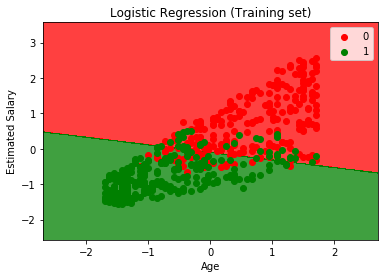

In [108]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, slr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


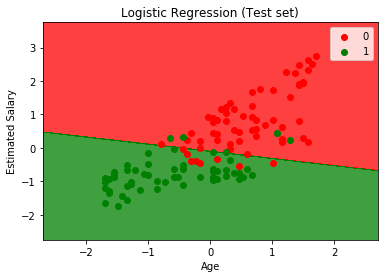

In [109]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, slr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [110]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 7].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
# Fitting Logistic Regression to the Training set (all variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0).fit(X_train, y_train)

In [112]:
# Predicting the Test set results
y_pred = lr.predict(X_test)

In [113]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[54  9]
 [ 6 51]]
